# Happy or Sad?

Sentiment classification utilizing Convolutional Neural Networks. The dataset is combination of collection of images from Google and Facial Expression Image Dataset for Computer Vision Algorithms (https://doi.org/10.17866/rd.salford.21220835.v1)

## 1. Loading the data set

In [41]:
import os
import cv2
import imghdr

In [42]:
directory = 'dataset'

In [43]:
os.listdir(directory)

['happy', 'sad']

In [22]:
image_exts = ['jpeg','jpg','bmp', 'png']

Cleaning the images which does not fit expected format: 

In [18]:
for image_class in os.listdir(directory):
    for image in os.listdir(os.path.join(directory, image_class)):
        image_path = os.path.join(directory, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("There is a issue with image {}".format(image_path))

### 1.2 Loading the data

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 411 files belonging to 2 classes.


In [46]:
data_iterator = data.as_numpy_iterator()

In [47]:
# Grabbing the batches
batch = data_iterator.next()

Data splitted into 32 batches, resized to be standard 256x256x3 numpy arrays:

In [48]:
batch[0].shape

(32, 256, 256, 3)

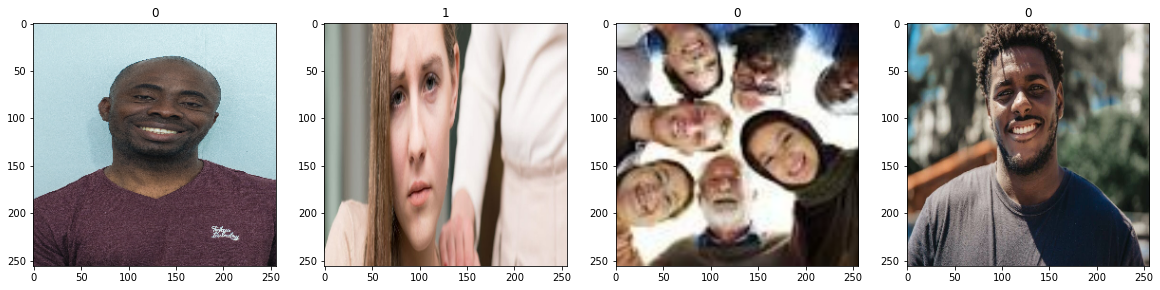

In [56]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][1:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][1:5][idx])

Label 0 represents the "happy" class 

## 2. Preprocessing the data

### 2.1 Scale data

In [72]:
data = data.map(lambda x,y: (x/255,y))

In [76]:
scaled_iterator = data.as_numpy_iterator()

In [77]:
batch = scaled_iterator.next()

In [79]:
batch[0].min()

0.0

Data is scaled successfully!

### 2.2 Splitting the data

In [80]:
len(data)

13

In [81]:
train_size = int(len(data)*0.7)
val_size   = int(len(data)*0.2)+1
test_size  = int(len(data)*0.1)

In [82]:
print(train_size,val_size,test_size)

9 3 1


In [83]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [84]:
print("Number of batches for training:  ", len(train))
print("Number of batches for validation:", len(val))
print("Number of batches for testing:   ", len(test))


Number of batches for training:   9
Number of batches for validation: 3
Number of batches for testing:    1


## 3. Model 

### 3.1 Build the Deep Learning architecture

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [86]:
model = Sequential()

In [87]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [88]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 3.2 Train

In [91]:
logdir = 'logscnn'

In [93]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [94]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 27s 2s/step - loss: 0.8343 - accuracy: 0.5174 - val_loss: 0.6465 - val_accuracy: 0.5208
Epoch 2/20
9/9 [==============================] - 23s 2s/step - loss: 0.5972 - accuracy: 0.6736 - val_loss: 0.5635 - val_accuracy: 0.6667
Epoch 3/20
9/9 [==============================] - 24s 2s/step - loss: 0.5595 - accuracy: 0.6771 - val_loss: 0.5348 - val_accuracy: 0.7812
Epoch 4/20
9/9 [==============================] - 24s 2s/step - loss: 0.4711 - accuracy: 0.8125 - val_loss: 0.5000 - val_accuracy: 0.7812
Epoch 5/20
9/9 [==============================] - 23s 2s/step - loss: 0.4191 - accuracy: 0.7986 - val_loss: 0.2844 - val_accuracy: 0.9167
Epoch 6/20
9/9 [==============================] - 24s 2s/step - loss: 0.2999 - accuracy: 0.9132 - val_loss: 0.3030 - val_accuracy: 0.8958
Epoch 7/20
9/9 [==============================] - 24s 2s/step - loss: 0.2194 - accuracy: 0.9444 - val_loss: 0.2716 - val_accuracy: 0.8750
Epoch 8/20
9/9 [==================

### 3.3 Plot performance

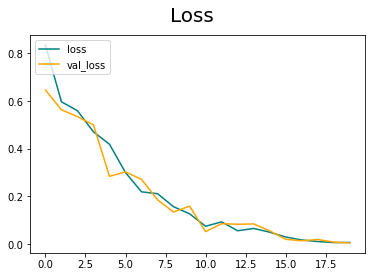

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

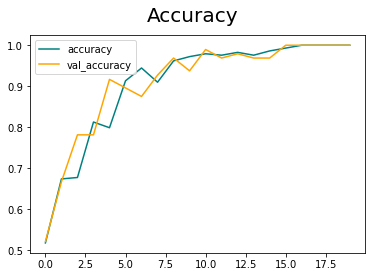

In [99]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Performace Evaluation 

### 4.1 Evaluate 

In [96]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [97]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [100]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

In [102]:
print(f'Precision:{precision.result().numpy()}')
print(f'Recall:{recall.result().numpy()}')
print(f'Accuracy:{accuracy.result().numpy()}')

Precision:1.0
Recall:1.0
Accuracy:1.0


### 4.2 Test

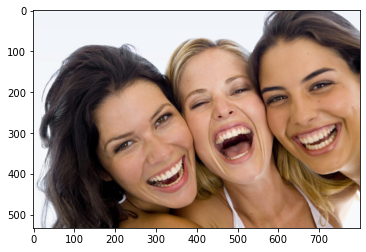

In [116]:
import cv2

img = cv2.imread('photo3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [117]:
resize = tf.image.resize(img,(256,256))

In [118]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [123]:
print(yhat)

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

[[0.32199955]]
Predicted class is Happy


## 5. Saving the model

In [121]:
from tensorflow.keras.models import load_model

In [122]:
model.save(os.path.join('models','imageclassifier.h5'))

#new_model = load_model('imageclassifier.h5')
#new_model.predict(np.expand_dims(resize/255, 0))